In [1]:
import re
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

passagem = pd.read_csv('data/2019_Passagem.csv', sep=';',encoding='cp1252', 
                       index_col=['Identificador do processo de viagem'],decimal=',')
pagamento = pd.read_csv('data/2019_Pagamento.csv', sep=';',encoding='cp1252', 
                        index_col=['Identificador do processo de viagem'],decimal=',')
trecho = pd.read_csv('data/2019_Trecho.csv', sep=';',encoding='cp1252', 
                     index_col=['Identificador do processo de viagem '],decimal=',')
viagem = pd.read_csv('data/2019_Viagem.csv', sep=';',encoding='cp1252', 
                     index_col=['Identificador do processo de viagem'],decimal=',')

outl_filter = 83000
outl_filtered = ((viagem['Valor diárias'] < outl_filter)&
(viagem['Valor passagens'] < outl_filter)&
(viagem['Valor outros gastos'] < outl_filter))

not_only_zero = ((viagem['Valor diárias'] > 0)|
(viagem['Valor passagens'] > 0)|
(viagem['Valor outros gastos'] > 0))

viagem['dt_ini'] = pd.to_datetime(viagem['Período - Data de início'], format='%d/%m/%Y')
viagem['dt_fim'] = pd.to_datetime(viagem['Período - Data de fim'], format='%d/%m/%Y')
viagem['duracao'] =  (viagem['dt_fim'] - viagem['dt_ini']).dt.days

### Pagamento

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem  
* **Código do Órgão Superior**: Código do Órgão Superior que custeou a despesa. ÓRGÃO SUPERIOR - Unidade da Administração Direta que tenha entidades por ele supervisionadas. Fonte: Manual do SIAFI
* **Nome Órgão Superior**: Nome do Órgão Superior
* **Código Órgão Pagador**: Código do Órgão que pagou a despesa. ÓRGÃO SUBORDINADO - Entidade supervisionada por um Órgão da Administração Direta. Fonte: Manual do SIAFI
* **Nome Órgão Pagador**: Nome do Órgão
* **Código UG Pagadora**: Código da Unidade Gestora que pagou a despesa. UNIDADE GESTORA (UG) - Unidade Orçamentária ou Administrativa que realiza atos de gestão orçamentária, financeira e/ou patrimonial, cujo titular, em consequência, está sujeito a tomada de contas anual na conformidade do disposto nos artigos 81 e 82 do Decreto-lei nr. 200, de 25 de fevereiro de 1967. Fonte: Manual do SIAFI
* **Nome UG Pagadora**: Nome da Unidade Gestora
* **Tipo de Pagamento**: Tipo da despesa paga pelo órgão (diária, passagem, seguro, etc.)
* **Valor da Despesa**: Valor da despesa paga

In [2]:
#pagamento.head()

### Passagem

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem  
* **Meio de transporte**: Meio de transporte da passagem
* **País – Origem Ida**: País de origem na ida
* **UF - Origem Ida**: UF de origem na ida
* **Cidade - Origem Ida**: Cidade de origem na ida
* **País - Destino Ida**: País de destino na ida
* **UF – Destino Ida**: UF de destino na ida
* **Cidade – Destino Ida**: Cidade de destino na ida
* **País – Origem Volta**: País de origem na volta
* **UF - Origem Volta**: UF de origem na volta
* **Cidade - Origem Volta**: Cidade de origem na volta
* **País - Destino Volta**: País de destino na volta
* **UF – Destino Volta**: UF de destino na volta
* **Cidade – Destino Volta**: Cidade de destino na volta
* **Valor da passagem**: Valor da passagem
* **Taxa de serviço**: Taxa de serviço da passagem

In [3]:
#passagem.head()

### Trecho

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem   
* **Sequência Trecho**: Sequência do trecho na viagem
* **Origem - Data**: Data de saída da origem
* **Origem – País**: País de origem
* **Origem – UF**: UF de origem
* **Origem – Cidade**: Cidade de origem
* **Destino - Data**: Data de chegada no destino
* **Destino – País**: País de destino
* **Destino – UF**: UF de destino
* **Destino – Cidade**: Cidade de destino
* **Meio de transporte**: Meio de transporte da origem para o destino
* **Número Diárias**: Número de diárias do trecho
* **Missão?**: Houve missão no trecho? ‘Sim’ ou ‘Não’

In [4]:
#trecho.head()

### Viagem

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem   
* **Situação**: Situação da viagem: ´não realizada´; ´realizada’
* **Código do Órgão Superior**: Código do Órgão Superior que custeou despesas da viagem. ÓRGÃO SUPERIOR - Unidade da Administração Direta que tenha entidades por ele supervisionadas. Fonte: Manual do SIAFI
* **Nome Órgão Superior**: Nome do Órgão Superior
* **Código Solicitante**: Código do Órgão que solicitou a viagem. ÓRGÃO SUBORDINADO - Entidade supervisionada por um Órgão da Administração Direta. Fonte: Manual do SIAFI
* **Nome Órgão Solicitante**: Nome do Órgão
* **CPF viajante**: CPF da pessoa que realizou a viagem
* **Nome**: Nome do viajante
* **Cargo**: Cargo do viajante
* **Período - Data de início**: Data de início de afastamento do servidor
* **Período - Data de fim**: Data de fim de afastamento do servidor
* **Destinos**: Locais pelos quais o viajante passará durante a viagem
* **Motivo**: Motivo da viagem
* **Valor Diárias**: Valor de diárias pagas pelo órgão, se houver
* **Valor Passagens**: Valor de passagens pagas pelo órgão, se houver
* **Valor Outros Gastos**: Valor de outros gastos pagos pelo órgão, se houver

In [6]:
viagem.head()

,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos,dt_ini,dt_fim,duracao
Identificador do processo de viagem,,,,,,,,,,,,,,,,,,
15045825,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.377.624-**,MARINA FERREIRA KITAZONO ANTUNES,NaN,06/02/2019,07/02/2019,Recife/PE,Regresso de bolsista CAPES do exterior- PE ( P...,0.0,3406.33,0.0,2019-02-06,2019-02-07,1
15100682,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.831.975-**,JORGE ANDRE DE CARVALHO MENDONCA,NaN,01/02/2019,02/02/2019,Recife/PE,Capacitação PDSE (Programa de Doutorado Sanduí...,0.0,2925.83,0.0,2019-02-01,2019-02-02,1
15114708,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.325.718-**,MARCO ANTONIO COUTO JUNIOR,PESQUISADOR EM GEOCIENCIA,01/02/2019,01/02/2019,São Paulo/SP,Capacitação no exterior - PDSE,0.0,2760.02,0.0,2019-02-01,2019-02-01,0
15163874,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.003.005-**,OLIVAL FREIRE JUNIOR,PROFESSOR DO MAGISTERIO SUPERIOR,17/02/2019,18/02/2019,Salvador/BA,Programa de Professor Visitante no Exterior - ...,0.0,2875.92,0.0,2019-02-17,2019-02-18,1
15166192,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.660.311-**,CARINA MENDES DOS SANTOS MELO,TECNICO I,20/02/2019,21/02/2019,Rio de Janeiro/RJ,Capacitação no exterior - PDSE.,0.0,2420.48,0.0,2019-02-20,2019-02-21,1


## Let's analyze

In [7]:
print('Len of each dataset: \n\tPagamento: {}\n\tPassagem: {} \n\tTrecho: {} \n\tViagem: {}'.
      format(len(pagamento), len(passagem), len(trecho), len(viagem)))
idx_pag, idx_pas, idx_tre, idx_via = set(pagamento.index), set(passagem.index), set(trecho.index), set(viagem.index)
print('Len of unique index of each dataset: \n\tPagamento: {}\n\tPassagem: {} \n\tTrecho: {} \n\tViagem: {}'.
      format(len(idx_pag), len(idx_pas), len(idx_tre), len(idx_via)))

Len of each dataset: 
	Pagamento: 1229537
	Passagem: 394714 
	Trecho: 1583957 
	Viagem: 762239
Len of unique index of each dataset: 
	Pagamento: 702852
	Passagem: 216020 
	Trecho: 652978 
	Viagem: 762239


In [8]:
'''
aaa = 2019001921
display(viagem[viagem.index == aaa])
display(trecho[trecho.index == aaa])
display(pagamento[pagamento.index == aaa])
display(passagem[passagem.index == aaa])
'''
#viagem[viagem.index.isin(ids_list)][(viagem['Valor diárias'] == 0)&(viagem['Valor passagens'] == 0)&(viagem['Valor outros gastos'] == 0)]
aaa = ':D'

In [9]:
viagem.describe()

,Código do órgão superior,Código órgão solicitante,Valor diárias,Valor passagens,Valor outros gastos,duracao
count,762239.000000,762239.000000,762239.000000,762239.000000,7.622390e+05,762239.000000
mean,30621.293020,30632.787695,942.513873,590.973593,3.051854e+01,4.655065
std,13909.548612,13770.301815,3552.759926,1281.939721,8.129940e+03,17.847861
min,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,25000.000000,25205.000000,88.500000,0.000000,0.000000e+00,1.000000
50%,26000.000000,26429.000000,431.300000,0.000000,0.000000e+00,2.000000
75%,38000.000000,37202.000000,808.500000,907.140000,0.000000e+00,4.000000
max,63000.000000,91214.000000,104793.110000,155531.360000,7.096160e+06,373.000000


In [10]:
print('Total de gastos com situação realiza: {}'.format(viagem[viagem['Situação'] == 'Realizada']['Valor diárias'].sum() + 
 viagem[viagem['Situação'] == 'Realizada']['Valor passagens'].sum() + 
 viagem[viagem['Situação'] == 'Realizada']['Valor outros gastos'].sum()))
print('1.163.471.765,73')

Total de gastos com situação realiza: 1163471765.7300003
1.163.471.765,73


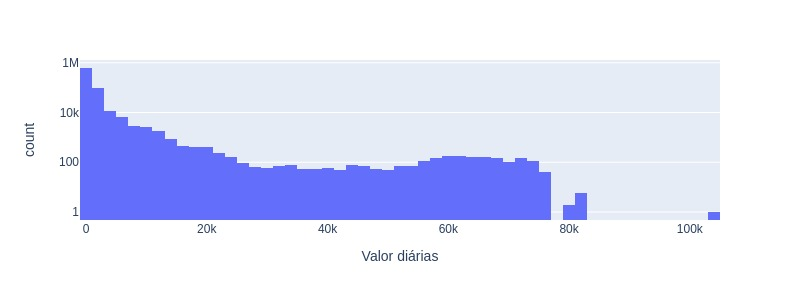

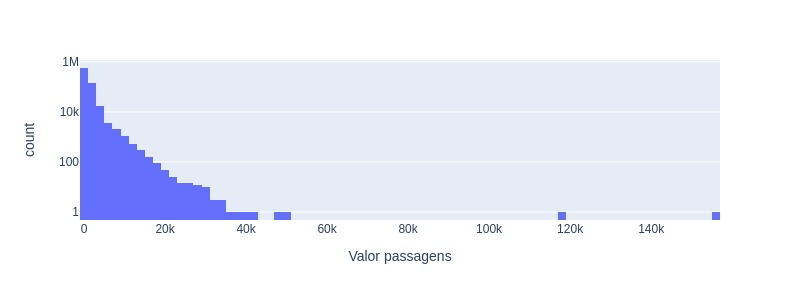

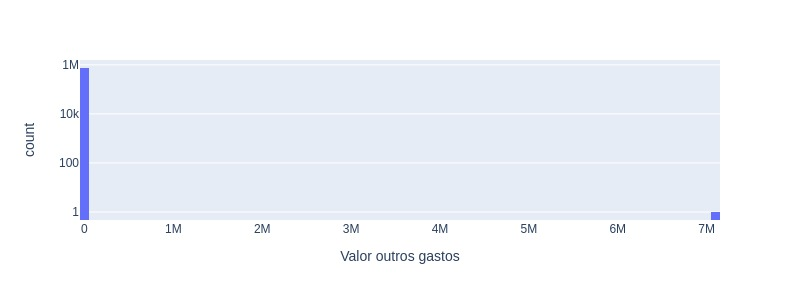

In [11]:
for enu, f in enumerate(['Valor diárias', 'Valor passagens', 'Valor outros gastos']):
    fig = px.histogram(viagem[viagem['Situação'] == 'Realizada'], 
                       x=f, 
                       log_y=True, # represent bars with log scale
                       nbins=100,                       
                      )
    fig['layout'].update(height=300, width=800)
    display(Image(fig.to_image('jpg')))

Temos nos três valores muito distântes da distribuição, provavelmente esses outliers são dados incluídos erroneamente. Retirando esses dados podemos ver uma distribuição mais clara apesar de ser necessário incluir uma escala logaritmica.

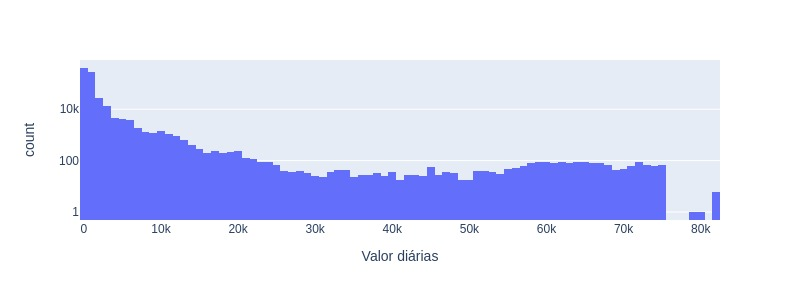

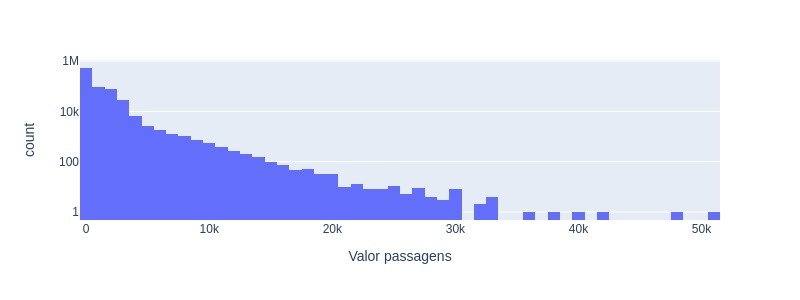

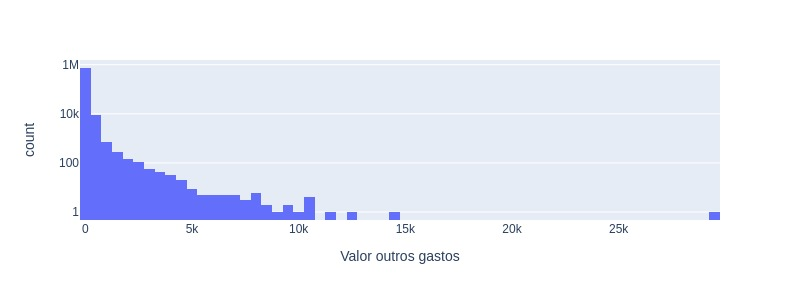

In [12]:
for enu, f in enumerate(['Valor diárias', 'Valor passagens', 'Valor outros gastos']):
    remove_out = [83000, 83000, 83000]#[83000, 53000, 30500]
    fig = px.histogram(viagem[viagem['Situação'] == 'Realizada'][viagem[f] <= remove_out[enu]], 
                       x=f, 
                       log_y=True, # represent bars with log scale
                       nbins=100,                       
                      )
    fig['layout'].update(height=300, width=800)
    display(Image(fig.to_image('jpg')))

Vamos analizar esses outliers, verificar os registros nas outras tabelas. 

Aparentemente há alguns erros de digitação, em especial relacionada a outras despesas. De toda forma, com exceção do registro sigiloso todos partiram do Distrito Federal.

In [13]:
outliers = {}
out_idx = []
for enu, f in enumerate(['Valor diárias', 'Valor passagens', 'Valor outros gastos']):
    remove_out = [83000, 83000, 83000]
    outliers[f] = viagem[viagem['Situação'] == 'Realizada'][viagem[f] > remove_out[enu]].index.values
    for i in outliers[f]:
        out_idx.append(i)

In [14]:
def print_viagem(i):
    vi = viagem[viagem.index == i]
    print('------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------')
    print('id: {} - nome: {}'.format(vi.index[0], vi['Nome'].values[0]))
    print('cpf: {} - cargo: {}'.format(vi['CPF viajante'].values[0], 
                                       vi['Cargo'].values[0]))
    print('------------------------------------------------------------------------------------------')
    print('Código do órgão superior: {} - Nome do órgão superior: {}'.format(vi['Código do órgão superior'].values[0],
                                                                             vi['Nome do órgão superior'].values[0]))
    print('Código órgão solicitante: {} - Nome órgão solicitante: {}'.format(vi['Código órgão solicitante'].values[0],
                                                                             vi['Nome órgão solicitante'].values[0]))
    print('Data ini: {} - Data fim: {}'.format(vi['Período - Data de início'].values[0], 
                                               vi['Período - Data de fim'].values[0]))
    print('Motivo da viagem: {}'.format(vi['Motivo'].values[0]))

    print('Vr. diárias: {}'.format(vi['Valor diárias'].values[0]))
    print('Vr. passagens: {}'.format(vi['Valor passagens'].values[0]))
    print('Vr. outros: {}'.format(vi['Valor outros gastos'].values[0]))
    
def print_trecho(i):
    print('## {} ##'.format(i[1]))
    print('## Origem {}'.format(i[2]))
    print('{} - {} - {}'.format(i[3],i[4],i[5]))
    print('## Destino {}'.format(i[6]))
    print('{} - {} - {}'.format(i[7],i[8],i[9]))
    print('Meio de transporte: {}'.format(i[10]))
    print('Diárias: {}'.format(i[11]))
    print('Missão: {}'.format(i[12]))
    
def print_pagamento(i):
    print('Cod Unidade Pagadora: {} - Nome: {}'.format(i[5], i[6]))
    print('Tipo: {}'.format(i[7]))
    print('Valor: {}'.format(i[8]))
    
def print_passagem(i):
    print('Meio: {}'.format(i[1]))
    print('{} - {} - {} -> {} - {} - {}'.format(i[2],i[3],i[4],i[5],i[6],i[7]))
    print('{} - {} - {} -> {} - {} - {}'.format(i[8],i[9],i[10],i[11],i[12],i[13]))
    print('Valor: {}'.format(i[14]))
    print('Taxa: {}'.format(i[15]))
    
def print_data(i):
    print_viagem(i)

    for tr in trecho[trecho.index == i].sort_values(['Sequência Trecho']).itertuples():
        print('-----------------------------------------TRECHO-------------------------------------------')
        tr = list(tr)
        print_trecho(tr)

    for pg in pagamento[pagamento.index == i].itertuples():
        print('---------------------------------------PAGAMENTO------------------------------------------')
        pg = list(pg)
        print_pagamento(pg)

    for pg in passagem[passagem.index == i].itertuples():
        print('----------------------------------------PASSAGEM------------------------------------------')
        pg = list(pg)
        print_passagem(pg)                    

In [15]:
out_idx

[16099936, 16154465, 16253216, 15805805]

In [16]:
print_data(16099936)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 16099936 - nome: Informações protegidas por sigilo
cpf: ***.000.000-** - cargo: Informações protegidas por sigilo
------------------------------------------------------------------------------------------
Código do órgão superior: 30000 - Nome do órgão superior: Ministério da Justiça e Segurança Pública
Código órgão solicitante: 30108 - Nome órgão solicitante: Departamento de Polícia Federal
Data ini: 01/06/2019 - Data fim: 02/12/2019
Motivo da viagem: Informação protegida por sigilo nos termos da legislação vigente
Vr. diárias: 104793.11
Vr. passagens: 8023.71
Vr. outros: 6395.73
---------------------------------------PAGAMENTO------------------------------------------
Cod Unidade Pagadora: -11 - Nome: Sigilosa
Tipo: PASSAGEM
Valor: 8023.71
---------------------------------------PAGAMENTO--------------

In [17]:
print_data(16154465)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 16154465 - nome: CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA
cpf: ***.493.141-** - cargo: TECNOLOGISTA
------------------------------------------------------------------------------------------
Código do órgão superior: 24000 - Nome do órgão superior: Ministério da Ciência, Tecnologia, Inovações e Comunicações
Código órgão solicitante: 20402 - Nome órgão solicitante: Agência Espacial Brasileira
Data ini: 09/06/2019 - Data fim: 16/06/2019
Motivo da viagem: Compor a delegação brasileira que participará da Reunião Plenária da ISO  TC20/SC14 - Space Systems and Operations, no período de 09 a 16 de junho de 2019, em Londres - Inglaterra, trânsito já incluído, com ônus.
Vr. diárias: 10761.28
Vr. passagens: 155531.36
Vr. outros: 0.0
-----------------------------------------TRECHO--------------------------------

In [18]:
print_data(16253216)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 16253216 - nome: LUCIANA MOURAO CERQUEIRA E SILVA
cpf: ***.902.886-** - cargo: nan
------------------------------------------------------------------------------------------
Código do órgão superior: 26000 - Nome do órgão superior: Ministério da Educação
Código órgão solicitante: 26291 - Nome órgão solicitante: Fundação Coordenação de Aperfeiçoamento de Pessoal de Nível Superior
Data ini: 16/07/2019 - Data fim: 19/07/2019
Motivo da viagem: Preparatório Seminário Psicologia
Vr. diárias: 879.7
Vr. passagens: 117096.47
Vr. outros: 0.0
-----------------------------------------TRECHO-------------------------------------------
## 1 ##
## Origem 16/07/2019
Brasil - Rio de Janeiro - Rio de Janeiro
## Destino 19/07/2019
Brasil - Distrito Federal - Brasília
Meio de transporte: Aéreo
Diárias: 3.0
Missão: Sim
-----

In [19]:
print_data(15805805)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 15805805 - nome: MURILO JOSE PERINI DA SILVA BRAGA
cpf: ***.047.737-** - cargo: AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL
------------------------------------------------------------------------------------------
Código do órgão superior: 25000 - Nome do órgão superior: Ministério da Economia
Código órgão solicitante: 25000 - Nome órgão solicitante: Ministério da Economia - Unidades com vínculo direto
Data ini: 09/02/2019 - Data fim: 11/02/2019
Motivo da viagem: PARTICIPAR DO 31º ENCONTRO DE REVISÃO PELOS PARES EM PROCESSO CAPITANEADO PELO FÓRUM GLOBAL SOBRE TRANSPARÊNCIA E INTERCÂMBIO DE INFORMAÇÕES TRIBUTÁRIAS EM PARIS/FRANÇA.
Vr. diárias: 8331.92
Vr. passagens: 3930.14
Vr. outros: 7096160.27
-----------------------------------------TRECHO-------------------------------------------
## 1 ##
## Origem 09

In [22]:
def concat_ct_dias(df, ct_ret=20):

    return list(map(lambda x: 'ct: {}, dias: {}'.format(x[0], x[1]),
    zip(df['ct'].head(ct_ret), 
     df['dias'].head(ct_ret))))

## Agrupar por viajante

In [23]:
viagem_nome = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Nome', 'CPF viajante']).agg(
        ct=('Nome','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_nome['vr_total'] = viagem_nome['vr_diarias'] + viagem_nome['vr_passagens'] + viagem_nome['vr_outros']
viagem_nome['per_total'] = viagem_nome['vr_total']*100/viagem_nome['vr_total'].sum()


viagem_nome = viagem_nome.sort_values(['vr_total'], ascending=False)
viagem_nome

,Nome,CPF viajante,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
88487,Informações protegidas por sigilo,***.000.000-**,86052,1.300856e+08,4.441281e+07,1374781.58,650338,1.758732e+08,1.521459e+01
24858,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,***.593.277-**,55,1.220097e+05,2.741467e+05,6229.78,187,4.023862e+05,3.480996e-02
45245,DECIO FABRICIO ODDONE DA COSTA,***.112.110-**,49,9.074483e+04,1.916900e+05,18422.07,84,3.008569e+05,2.602679e-02
132605,MARCOS CESAR PONTES,***.971.638-**,46,1.526832e+05,1.213155e+05,10730.37,117,2.847291e+05,2.463158e-02
59181,ERIVALDO ALFREDO GOMES,***.969.471-**,15,1.367326e+05,1.276497e+05,1329.35,99,2.657117e+05,2.298641e-02
...,...,...,...,...,...,...,...,...,...
200225,YOABRI DEL CARMEN MARQUEZ YEGUEZ,***.697.732-**,1,0.000000e+00,1.000000e-02,0.00,1,1.000000e-02,8.650885e-10
79641,GUSTAVO ATHAYDE MARCONDES,***.119.017-**,1,0.000000e+00,1.000000e-02,0.00,0,1.000000e-02,8.650885e-10
138507,MARIA ROSA BATISTA MACIEL,***.345.923-**,1,0.000000e+00,1.000000e-02,0.00,1,1.000000e-02,8.650885e-10
17769,ANGEL MATHIAS MARTINEZ GUERRERO,***.837.892-**,1,0.000000e+00,1.000000e-02,0.00,1,1.000000e-02,8.650885e-10


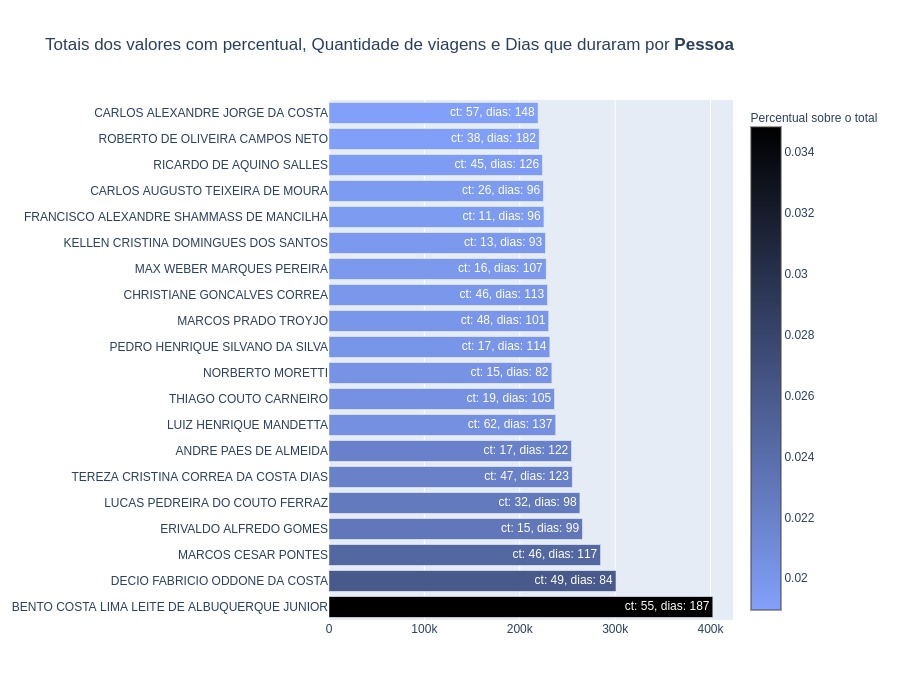

In [81]:
x = viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo']['vr_total'].head(20)
y = viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo']['Nome'].head(20)
text = concat_ct_dias(viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo'])
per_total = viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo']['per_total'].head(20)


bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Viajantes',
              orientation='h',
              #marker_color=per_total,
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"]),             
             )
layout = go.Layout(height=700, width=900)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Pessoa</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

In [26]:
#com_bolso = viagem[viagem['Motivo'].fillna('').str.contains('Bolsonaro', flags=re.IGNORECASE, regex=True)]
viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo'].describe()

,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
count,200887.000000,200887.000000,200887.000000,200887.000000,200887.000000,200887.000000,2.008870e+05
mean,3.105721,2900.369560,1932.597492,45.785292,13.444175,4878.752344,4.220552e-04
std,4.637787,7767.342761,4918.435234,253.973597,36.131623,10658.925329,9.220913e-04
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,8.650885e-10
25%,1.000000,380.040000,0.000000,0.000000,2.000000,701.420000,6.067904e-05
50%,2.000000,952.440000,93.100000,0.000000,5.000000,1959.200000,1.694881e-04
75%,3.000000,2365.525000,2037.340000,0.000000,12.000000,4425.000000,3.828017e-04
max,162.000000,152683.160000,274146.670000,29546.000000,363.000000,402386.160000,3.480996e-02


In [47]:
valor_total_sigilo = viagem_nome[viagem_nome['Nome'] == 'Informações protegidas por sigilo']['vr_total'].values[0]
valor_total = viagem_nome['vr_total'].sum()
print('valor gasto sigiloso: {:,.2f}'.format(valor_total_sigilo))
print('percentual do valor sigiloso sobre o total: {:.2f}%'.format(valor_total_sigilo*100/valor_total))

valor gasto sigiloso: 175,873,203.74
percentual do valor sigiloso sobre o total: 15.21%


## Agrupar por Cargo

In [48]:
viagem_cargo = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Cargo']).agg(
        ct=('Cargo','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_cargo['vr_total'] = viagem_cargo['vr_diarias'] + viagem_cargo['vr_passagens'] + viagem_cargo['vr_outros']
viagem_cargo['per_total'] = viagem_cargo['vr_total']*100/viagem_cargo['vr_total'].sum()

viagem_cargo = viagem_cargo.sort_values(['vr_total'], ascending=False)
viagem_cargo

,Cargo,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
487,Informações protegidas por sigilo,86052,1.300856e+08,4.441281e+07,1374781.58,650338,1.758732e+08,25.488815
620,PROFESSOR DO MAGISTERIO SUPERIOR,55643,3.963451e+07,3.643979e+07,758623.34,154821,7.683292e+07,11.135182
621,PROFESSOR ENS BASICO TECN TECNOLOGICO,36454,1.757347e+07,1.172507e+07,651074.60,69142,2.994961e+07,4.340514
748,TECNICO DO SEGURO SOCIAL,13351,1.754987e+07,4.932354e+06,749185.42,86081,2.323141e+07,3.366864
233,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,13184,8.726443e+06,1.007990e+07,382357.23,32012,1.918870e+07,2.780965
...,...,...,...,...,...,...,...,...
638,PROGRAMADOR SENIOR,1,6.768000e+01,0.000000e+00,0.00,0,6.768000e+01,0.000010
550,OPERADOR DE COMPUTA??O,1,6.768000e+01,0.000000e+00,0.00,0,6.768000e+01,0.000010
157,ARTIFICE DE ELETRICIDADE,1,6.228000e+01,0.000000e+00,0.00,0,6.228000e+01,0.000009
378,DIRETOR DE PROGRAMAS,1,6.063000e+01,0.000000e+00,0.00,0,6.063000e+01,0.000009


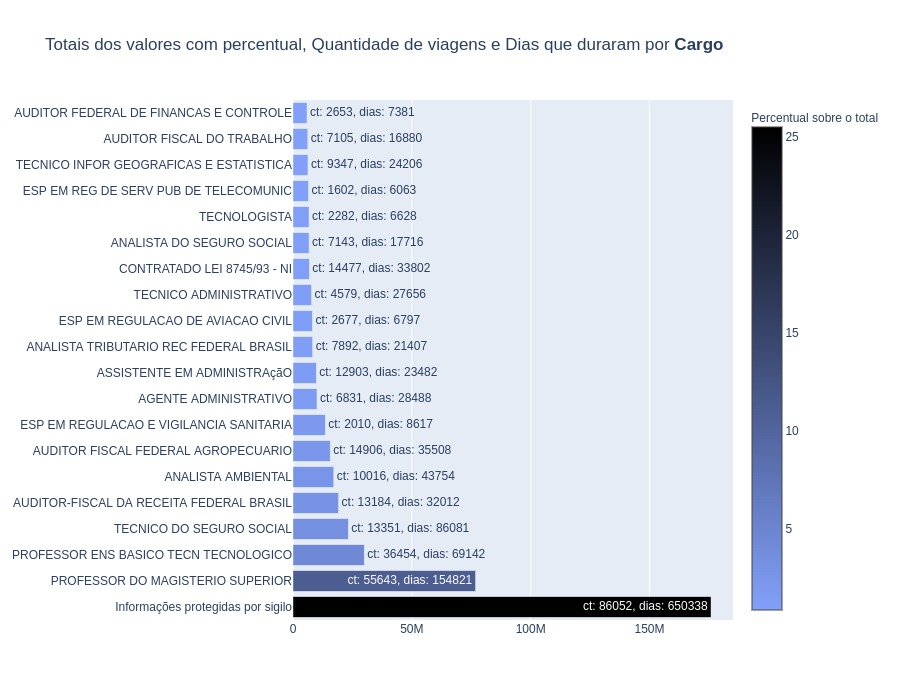

In [80]:
x = viagem_cargo[viagem_cargo['Cargo'] != '1Informações protegidas por sigilo']['vr_total'].head(20)
y = viagem_cargo[viagem_cargo['Cargo'] != '1Informações protegidas por sigilo']['Cargo'].head(20)
text = concat_ct_dias(viagem_cargo[viagem_cargo['Cargo'] != '1Informações protegidas por sigilo'])
per_total = viagem_cargo[viagem_cargo['Cargo'] != '1Informações protegidas por sigilo']['per_total'].head(20)

bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Cargos',
              orientation='h',
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"])
             )
layout = go.Layout(height=700, width=900)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Cargo</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

In [50]:
viagem_cargo[viagem_cargo['Cargo'] != 'Informações protegidas por sigilo'].describe()

,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
count,892.000000,8.920000e+02,8.920000e+02,892.000000,892.000000,8.920000e+02,892.000000
mean,455.701794,3.226569e+05,2.460854e+05,7634.674148,1303.456278,5.763770e+05,0.083533
std,2614.916204,1.763688e+06,1.469000e+06,48918.972812,7231.771424,3.229123e+06,0.467988
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.045000e+01,0.000006
25%,4.000000,2.369160e+03,1.149007e+03,0.000000,10.000000,4.891275e+03,0.000709
50%,18.000000,1.399112e+04,7.414100e+03,49.135000,55.500000,2.206611e+04,0.003198
75%,114.250000,8.662824e+04,5.328813e+04,1130.520000,362.250000,1.576753e+05,0.022851
max,55643.000000,3.963451e+07,3.643979e+07,758623.340000,154821.000000,7.683292e+07,11.135182


## Agrupar por situação

In [53]:
viagem_situacao = viagem[outl_filtered][not_only_zero].groupby(
        ['Situação']).agg(
        ct=('Situação','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_situacao['vr_total'] = viagem_situacao['vr_diarias'] + viagem_situacao['vr_passagens'] + viagem_situacao['vr_outros']
viagem_situacao['per_total'] = viagem_situacao['vr_total']*100/viagem_situacao['vr_total'].sum()

viagem_situacao = viagem_situacao.sort_values(['vr_total'], ascending=False)
viagem_situacao

,Situação,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
1,Realizada,709955,7.127331e+08,4.326543e+08,10572451.60,3351110,1.155960e+09,97.579455
0,Não realizada,15959,5.562931e+06,1.752426e+07,5587411.84,52339,2.867461e+07,2.420545


In [57]:
print('Percentual da quantidade de registros "Não realizado": {}'.format(viagem_situacao[viagem_situacao.index == 0]['ct'].values/viagem_situacao[viagem_situacao.index == 1]['ct'].values *100))
print('Percentual do valor total "Não realizado": {}'.format(viagem_situacao[viagem_situacao.index == 0]['vr_total'].values/viagem_situacao[viagem_situacao.index == 1]['vr_total'].values *100))

Percentual da quantidade de registros "Não realizado": [2.24788895]
Percentual do valor total "Não realizado": [2.4805884]


## Agrupar por Nome do órgão superior pagante e solicitante

In [78]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Nome do órgão superior']).agg(
        ct=('Nome do órgão superior','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']
viagem_temp['per_total'] = viagem_temp['vr_total']*100/viagem_temp['vr_total'].sum()

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

,Nome do órgão superior,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
22,Sem informação,57721,1.814083e+08,4.932310e+07,1581136.90,878508,2.323126e+08,20.096941
8,Ministério da Educação,195895,1.024519e+08,9.688282e+07,2611335.44,425112,2.019461e+08,17.469989
11,Ministério da Justiça e Segurança Pública,90268,1.314987e+08,4.137523e+07,1262677.07,668874,1.741366e+08,15.064242
6,Ministério da Defesa,117133,9.226414e+07,7.097366e+07,918240.57,542533,1.641560e+08,14.200842
7,Ministério da Economia,68250,4.979664e+07,2.568992e+07,2024934.72,219727,7.751150e+07,6.705380
12,Ministério da Saúde,42040,2.869730e+07,2.969101e+07,379322.53,121627,5.876764e+07,5.083882
2,"Ministério da Agricultura, Pecuária e Abasteci...",39775,2.718571e+07,1.451448e+07,259688.96,124273,4.195988e+07,3.629873
17,Ministério do Meio Ambiente,22958,2.594036e+07,1.407399e+07,359441.07,138119,4.037379e+07,3.492664
10,Ministério da Infraestrutura,17975,1.449054e+07,1.691411e+07,243903.20,46505,3.164855e+07,2.737859
4,"Ministério da Ciência, Tecnologia, Inovações e...",11874,1.464685e+07,1.564836e+07,206873.41,36635,3.050208e+07,2.638680


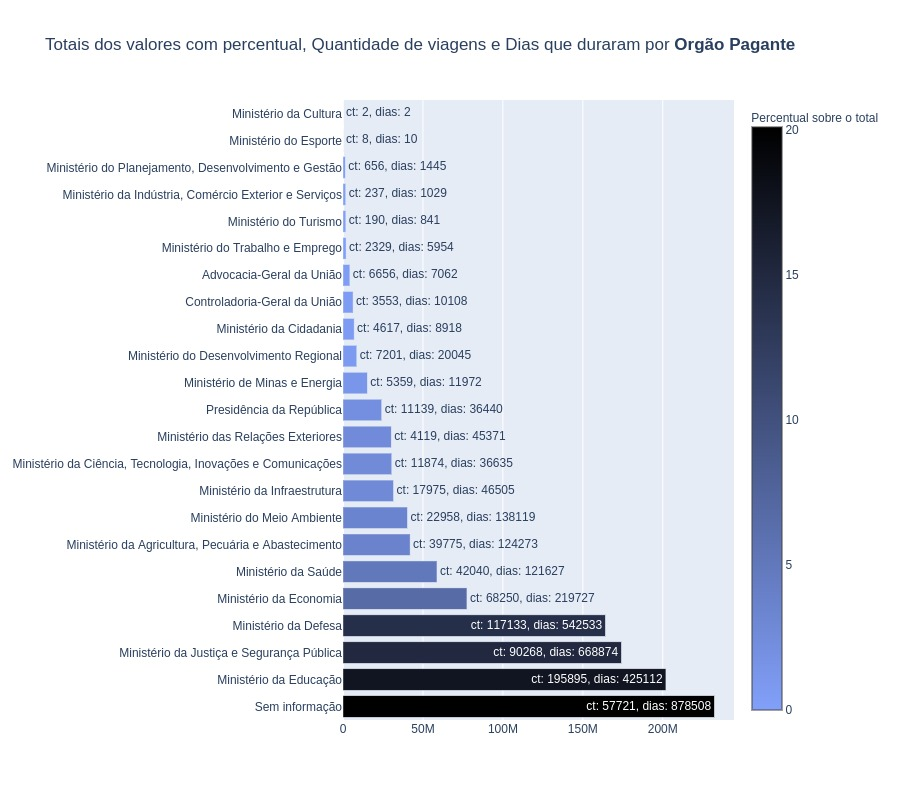

In [79]:
x = viagem_temp['vr_total'].head(30)
y = viagem_temp['Nome do órgão superior'].head(30)
text = concat_ct_dias(viagem_temp, 30)
per_total = viagem_temp['per_total'].head(30)

bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Cargos',
              orientation='h',
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"])
             )
layout = go.Layout(height=800, width=900)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Orgão Pagante</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

In [75]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Nome órgão solicitante']).agg(
        ct=('Nome órgão solicitante','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']
viagem_temp['per_total'] = viagem_temp['vr_total']*100/viagem_temp['vr_total'].sum()

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

,Nome órgão solicitante,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
138,Sem informação,57721,1.814083e+08,4.932310e+07,1581136.90,878508,2.323126e+08,20.096941
29,Departamento de Polícia Federal,47583,7.078553e+07,2.133469e+07,505683.77,357316,9.262590e+07,8.012900
18,Comando da Aeronáutica,62412,4.900494e+07,3.703098e+07,280052.20,320604,8.631597e+07,7.467039
30,Departamento de Polícia Rodoviária Federal,33771,4.688397e+07,1.671778e+07,702965.90,236737,6.430472e+07,5.562885
19,Comando do Exército,49600,3.701390e+07,2.208331e+07,293647.03,188153,5.939086e+07,5.137796
...,...,...,...,...,...,...,...,...
13,Caixa de Financiamento Imobiliário da Aeronáutica,35,1.669127e+04,3.140738e+04,0.00,46,4.809865e+04,0.004161
11,Autoridade Pública Olímpica,6,3.102690e+03,2.133500e+04,0.00,7,2.443769e+04,0.002114
121,Ministério da Cultura - Unidades com vínculo d...,2,9.104200e+02,5.256200e+03,0.00,2,6.166620e+03,0.000533
132,Ministério do Esporte - Unidades com vínculo d...,2,9.355000e+02,3.828130e+03,0.00,3,4.763630e+03,0.000412


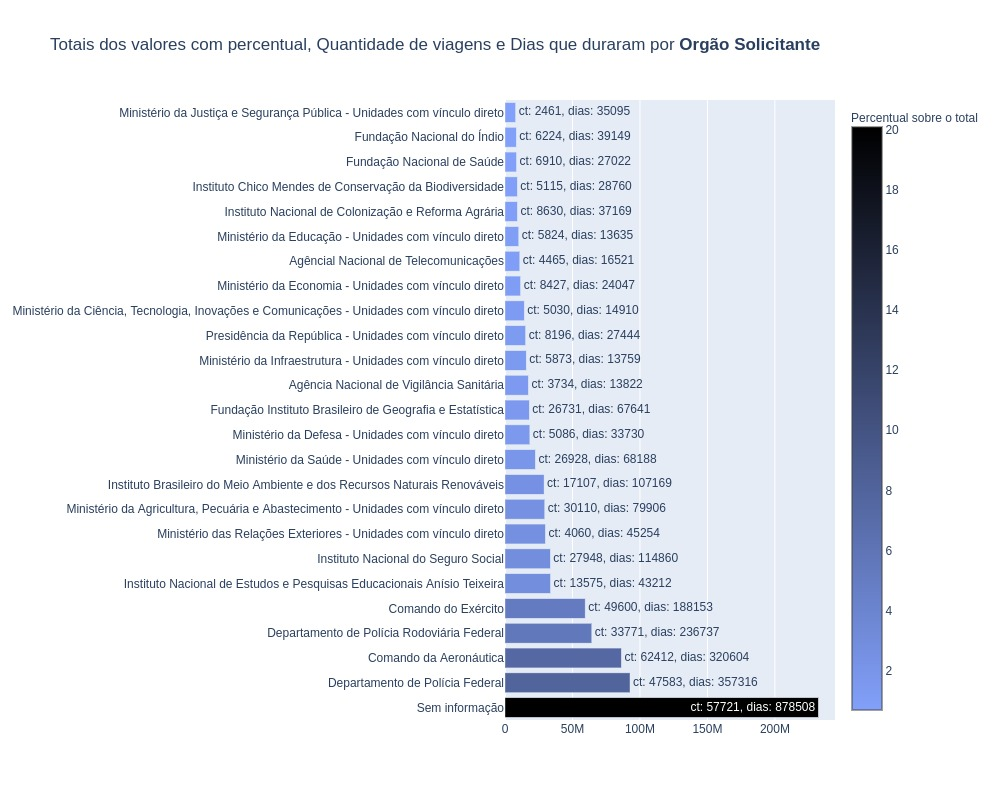

In [77]:
x = viagem_temp['vr_total'].head(25)
y = viagem_temp['Nome órgão solicitante'].head(25)
text = concat_ct_dias(viagem_temp, 25)
per_total = viagem_temp['per_total'].head(25)

bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Cargos',
              orientation='h',
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"])
             )
layout = go.Layout(height=800, width=1000)
fig = go.Figure(data=[bars], layout=layout)
fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Orgão Solicitante</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

## Agrupar por Destinos

In [67]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Destinos']).agg(
        ct=('Destinos','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']
viagem_temp['per_total'] = viagem_temp['vr_total']*100/viagem_temp['vr_total'].sum()

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

,Destinos,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
13331,Informações protegidas por sigilo,86052,1.300856e+08,4.441281e+07,1374781.58,650338,1.758732e+08,1.521447e+01
4263,Brasília/DF,56770,5.483602e+07,8.520079e+07,574896.46,221829,1.406117e+08,1.216407e+01
24047,Rio de Janeiro/RJ,25871,1.713856e+07,2.886682e+07,210056.82,85838,4.621544e+07,3.998014e+00
27885,São Paulo/SP,27665,1.659791e+07,2.462794e+07,605614.38,69887,4.183146e+07,3.618764e+00
26033,Sem informação,23575,1.841377e+07,2.159496e+07,342509.34,90857,4.035124e+07,3.490713e+00
...,...,...,...,...,...,...,...,...
21754,"Pitangueiras/SP, Sertãozinho/SP",1,0.000000e+00,0.000000e+00,12.40,0,1.240000e+01,1.072702e-06
9081,"Cubatão/SP, São Bernardo do Campo/SP",1,1.236000e+01,0.000000e+00,0.00,0,1.236000e+01,1.069241e-06
23708,"Ribeirão Preto/SP, Jaboticabal/SP",1,0.000000e+00,0.000000e+00,11.80,0,1.180000e+01,1.020797e-06
5270,"Brodósqui/SP, Sertãozinho/SP",1,0.000000e+00,0.000000e+00,11.80,0,1.180000e+01,1.020797e-06


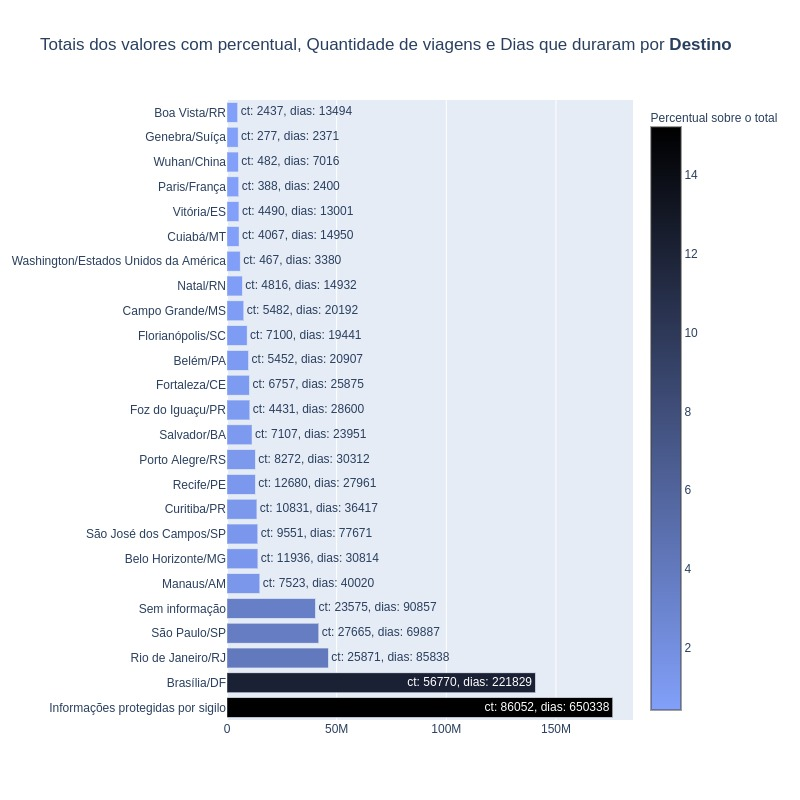

In [73]:
x = viagem_temp['vr_total'].head(25)
y = viagem_temp['Destinos'].head(25)
text = concat_ct_dias(viagem_temp, 25)
per_total = viagem_temp['per_total'].head(25)

bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Destinos',
              orientation='h',
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"])
             )
layout = go.Layout(height=800, width=800)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Destino</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

## Agrupar por Data Início

In [88]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Período - Data de início']).agg(
        ct=('Período - Data de início','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']
viagem_temp['per_total'] = viagem_temp['vr_total']*100/viagem_temp['vr_total'].sum()

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

,Período - Data de início,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
358,31/01/2019,2952,1.065934e+08,1567153.03,324829.14,552871,1.084854e+08,9.384878
338,29/04/2019,3082,8.885930e+06,1379874.49,48315.97,45790,1.031412e+07,0.892256
255,22/04/2019,5494,5.249765e+06,3679748.45,78740.29,25345,9.008254e+06,0.779288
29,03/06/2019,4924,5.194381e+06,2940980.33,68714.95,25021,8.204077e+06,0.709720
298,25/11/2019,6409,4.779451e+06,3266934.08,92550.84,23014,8.138936e+06,0.704085
...,...,...,...,...,...,...,...,...
357,30/12/2019,238,8.752842e+04,13902.59,875.34,433,1.023063e+05,0.008850
299,25/12/2019,79,3.623240e+04,51642.32,475.57,330,8.835029e+04,0.007643
335,28/12/2019,55,2.509062e+04,25821.30,793.70,184,5.170562e+04,0.004473
364,31/12/2019,36,4.670693e+04,2105.63,140.00,255,4.895256e+04,0.004235


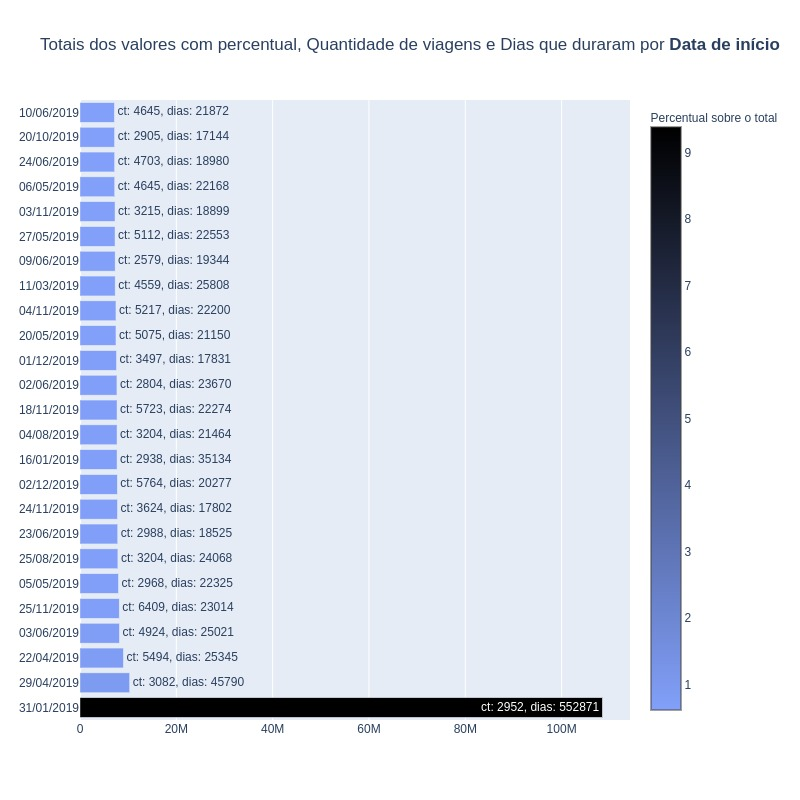

In [89]:
x = viagem_temp['vr_total'].head(25)
y = viagem_temp['Período - Data de início'].head(25)
text = concat_ct_dias(viagem_temp, 25)
per_total = viagem_temp['per_total'].head(25)

bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Período - Data de início',
              orientation='h',
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"])
             )
layout = go.Layout(height=800, width=800)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Data de início</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

## Agrupar por Motivo

In [90]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Motivo']).agg(
        ct=('Motivo','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum'),
        dias=('duracao','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']
viagem_temp['per_total'] = viagem_temp['vr_total']*100/viagem_temp['vr_total'].sum()

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

,Motivo,ct,vr_diarias,vr_passagens,vr_outros,dias,vr_total,per_total
127252,Informação protegida por sigilo nos termos da ...,86052,1.300856e+08,4.441281e+07,1374781.58,650338,1.758732e+08,1.521447e+01
280399,Prestar apoio a Diretoria da Força Nacional de...,182,7.509125e+06,1.982904e+05,21900.80,39950,7.729316e+06,6.686492e-01
146791,"Nova PCDP, após encerramento do exercício anua...",1746,5.105822e+06,1.046601e+04,4390.20,24371,5.120678e+06,4.429806e-01
258279,Participação do proposto nos 7° Jogos Mundiais...,416,5.233482e+05,3.809438e+06,207784.54,6114,4.540571e+06,3.927966e-01
60750,"CONSULTA MÉDICA, CONFORME ITEM 5.6.1, DA ICA 1...",697,9.173270e+03,1.338522e+06,0.00,1754,1.347696e+06,1.165867e-01
...,...,...,...,...,...,...,...,...
96098,DEPENDENTE DO SERVIDOR QUE IRÁ Exercer Função ...,1,0.000000e+00,4.000000e-02,0.00,0,4.000000e-02,3.460328e-09
10778,A SERVIDORA TAINÁ LEANDRO (PCDP 1319/19) IRÁ A...,1,0.000000e+00,4.000000e-02,0.00,2,4.000000e-02,3.460328e-09
60764,"CONSULTA MÉDICA, PACIENTE MENOR DE 01 ANO, NAS...",1,0.000000e+00,2.000000e-02,0.00,4,2.000000e-02,1.730164e-09
10779,A SERVIDORA TAINÁ LEANDRO (PCDP 849/19) IRÁ AC...,1,0.000000e+00,2.000000e-02,0.00,2,2.000000e-02,1.730164e-09


In [101]:
viagem_temp.head(1)['Motivo'].values

array(['Informação protegida por sigilo nos termos da legislação vigente'],
      dtype=object)

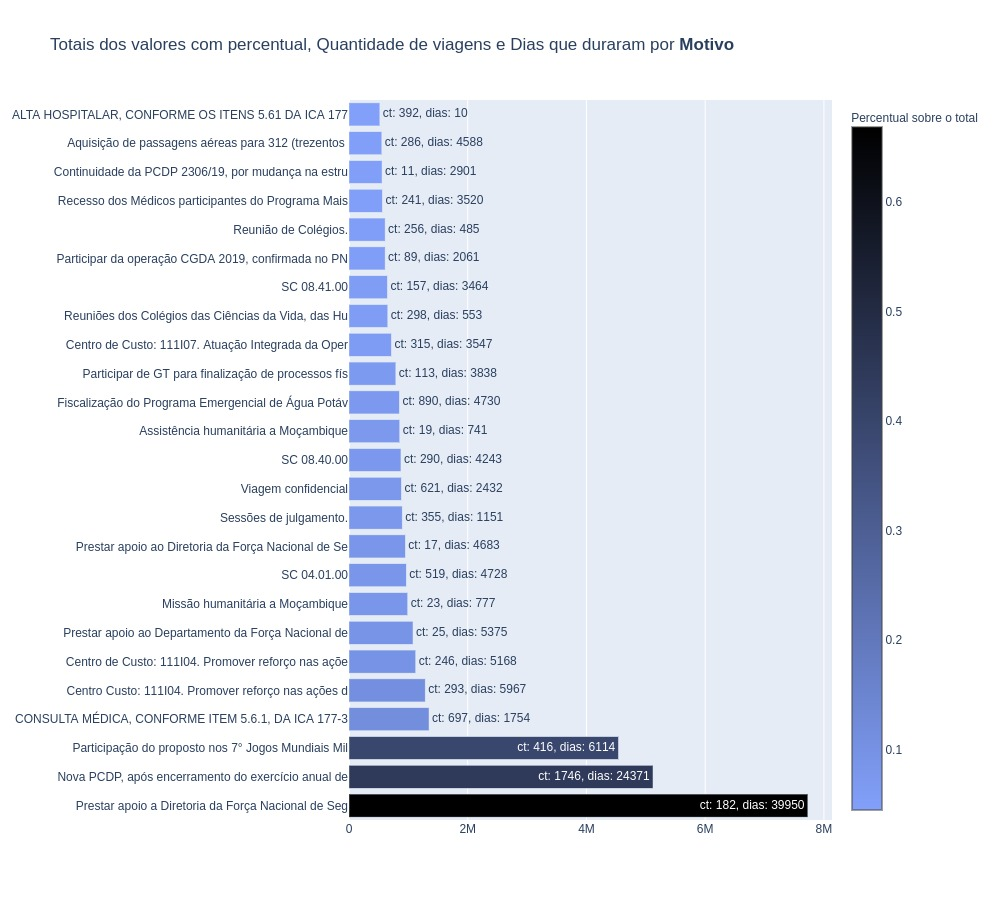

In [103]:
x = viagem_temp[viagem_temp['Motivo'] != 'Informação protegida por sigilo nos termos da legislação vigente']['vr_total'].head(25)
y = viagem_temp[viagem_temp['Motivo'] != 'Informação protegida por sigilo nos termos da legislação vigente']['Motivo'].str.slice(0, 50).head(25)
text = concat_ct_dias(viagem_temp[viagem_temp['Motivo'] != 'Informação protegida por sigilo nos termos da legislação vigente'], 25)
per_total = viagem_temp[viagem_temp['Motivo'] != 'Informação protegida por sigilo nos termos da legislação vigente']['per_total'].head(25)

bars = go.Bar(y=y, 
              x=x,
              text=text,
              textposition='auto',
              name='Motivo',
              orientation='h',
              marker=dict(
                    color=per_total,
                    colorbar=dict(
                        title="Percentual sobre o total"
                    ),
                    colorscale=["rgb(130,160,250)", "black"])
             )
layout = go.Layout(height=900, width=1000)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Totais dos valores com percentual, Quantidade de viagens e Dias que duraram por <b>Motivo</b>')

display(Image(fig.to_image('jpg')))
#fig.show()

In [85]:
viagem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762239 entries, 15045825 to 2019002869
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Situação                  762239 non-null  object        
 1   Código do órgão superior  762239 non-null  int64         
 2   Nome do órgão superior    762239 non-null  object        
 3   Código órgão solicitante  762239 non-null  int64         
 4   Nome órgão solicitante    762239 non-null  object        
 5   CPF viajante              762235 non-null  object        
 6   Nome                      762239 non-null  object        
 7   Cargo                     534117 non-null  object        
 8   Período - Data de início  762239 non-null  object        
 9   Período - Data de fim     762239 non-null  object        
 10  Destinos                  762239 non-null  object        
 11  Motivo                    762238 non-null  object     

In [86]:
viagem[viagem['duracao'] == viagem['duracao'][viagem['Situação'] != 'Não realizada'].max()]

,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos,dt_ini,dt_fim,duracao
Identificador do processo de viagem,,,,,,,,,,,,,,,,,,
15764472,Realizada,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,***.297.747-**,ALEXANDRE MEDEIROS CORREIA DE SOUSA,TECNOLOGISTA EM SAUDE PUBLICA,01/01/2019,31/12/2019,Coimbra/Portugal,Curso de Doutoramento na Universidade de Coimb...,0.0,0.0,0.0,2019-01-01,2019-12-31,364
15765569,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Bi...",***.778.166-**,LUCIANA PALMEIRA BRAGA,ANALISTA ADMINISTRATIVO,01/01/2019,31/12/2019,Grenoble/França,Participará do curso de Pós-Graduação Stricto ...,0.0,0.0,0.0,2019-01-01,2019-12-31,364
15883679,Realizada,26000,Ministério da Educação,26000,Ministério da Educação - Unidades com vínculo ...,***.104.494-**,RUBENS DIEGO FERNANDES ALVES,PROFESSOR ENS BASICO TECN TECNOLOGICO,01/01/2019,31/12/2019,Porto/Portugal,Capacitação do servidor para realizar estudos ...,0.0,0.0,0.0,2019-01-01,2019-12-31,364
